In [135]:
from artificial_data import generate_data, true_ce
from ridgereliability import metrics as r_metrics, plots
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, linear_model, metrics as sk_metrics, neural_network

In [113]:
X, y, z = generate_data(
    num_features=5,
    num_classes=2,
    num_samples=10000,
    std=1.5,
    radius=4,
    imbalance=1
)

In [114]:
X, X_test, y, y_test, z, z_test = model_selection.train_test_split(X, y, z, test_size=0.3)

In [115]:
base = linear_model.LogisticRegression()
base.fit(X, y)
base_pred = base.predict(X_test)
base_prob = base.predict_proba(X_test)

In [116]:
sk_metrics.accuracy_score(base_pred, y_test)

0.9693333333333334

In [117]:
r_metrics.peace(base_prob.max(axis=1), base_pred, y_test)

0.04545360668281448

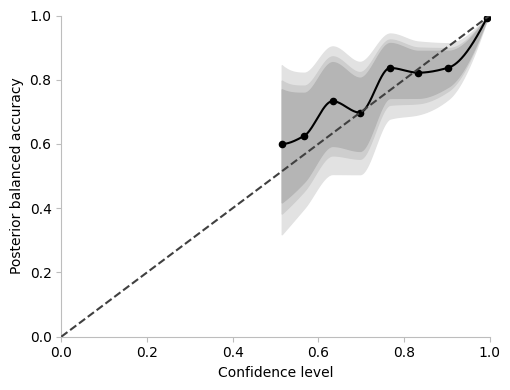

In [118]:
_ = plots.posterior_reliability_diagram(base_prob.max(axis=1), base_pred, y_test, bins=15)

In [132]:
mlp_probs = np.empty((4, len(X_test), 2), dtype=np.float)
mlp_preds = np.empty((4, len(X_test)), dtype=int)

for i, hls in enumerate(tqdm([
    (50,),
    (50, 50),
    (50, 50, 50),
    (50, 50, 50, 50)
])):
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=hls, activation="relu", max_iter=5000)
    mlp.fit(X, y)
    mlp_preds[i] = mlp.predict(X_test)
    mlp_probs[i] = mlp.predict_proba(X_test)

In [133]:
for i in range(4):
    print(f"{sk_metrics.accuracy_score(mlp_preds[i], y_test)}, {r_metrics.peace(mlp_probs[i].max(axis=1), mlp_preds[i], y_test)}")

0.97, 0.04399620214847943
0.9616666666666667, 0.0634844106932134
0.9573333333333334, 0.08895789689248182
0.9576666666666667, 0.08507967193985723


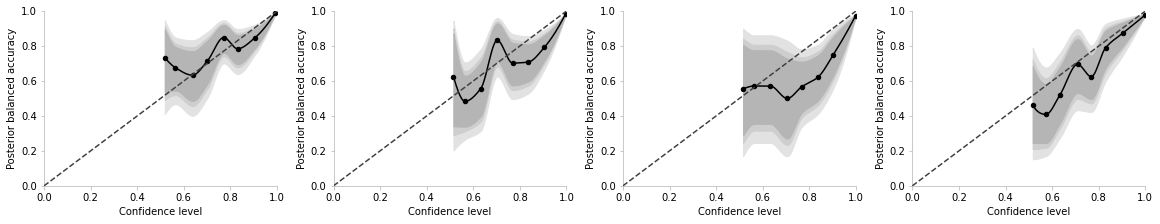

In [141]:
fig, axes = plt.subplots(1 ,4, subplot_kw=dict(aspect=0.75), constrained_layout=True, figsize=(16, 4))

for i, ax in enumerate(axes):
    plots.posterior_reliability_diagram(mlp_probs[i].max(axis=1), mlp_preds[i], y_test, bins=15, ax=ax)